# Bike Sharing Assignments

Target Variable: cnt

Step 1: Reading and Understanding the Data

Step 2: Data Preparation

Step 3: Model Building

Step 4: Model Evaluation and Prediction

# Step 1: Reading and Understanding the Data

In [5]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# load Data
bike = pd.read_csv("day.csv")

In [7]:
# Look into the data
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
# Check data distribution
bike.describe() 

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
# Check data type and null values
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Map Numeric Categorical Variables into string

In [10]:
# map integer valus of categorical feature 'season' to appropriate string value
season_map = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
bike['season'] = bike['season'].map(season_map)

# map integer valus of categorical feature 'month' to appropriate string value
month_map = {1:'jan', 2:'feb', 3:'mar', 4:'apr',5:'may', 6:'jun', 7:'jul', 8:'aug',9:'sep', 10:'oct', 11:'nov', 12:'dec'}
bike['mnth'] = bike['mnth'].map(month_map)

# map integer valus of categorical feature 'weekday' to appropriate string value
weekday_map = {0:'sun',1:'mon', 2:'tue', 3:'wed', 4:'thu',5:'fri', 6:'sat'}
bike['weekday'] = bike['weekday'].map(weekday_map)

# map integer valus of categorical feature 'weathersit' to appropriate string value
weathersit_map = {1:'Clear', 2:'Mist', 3:'Light Snow', 4:'Heavy Rain'}
bike['weathersit'] = bike['weathersit'].map(weathersit_map)

### Visualising the Data

###### Visualize Numeric Variables

<Figure size 1440x1080 with 0 Axes>

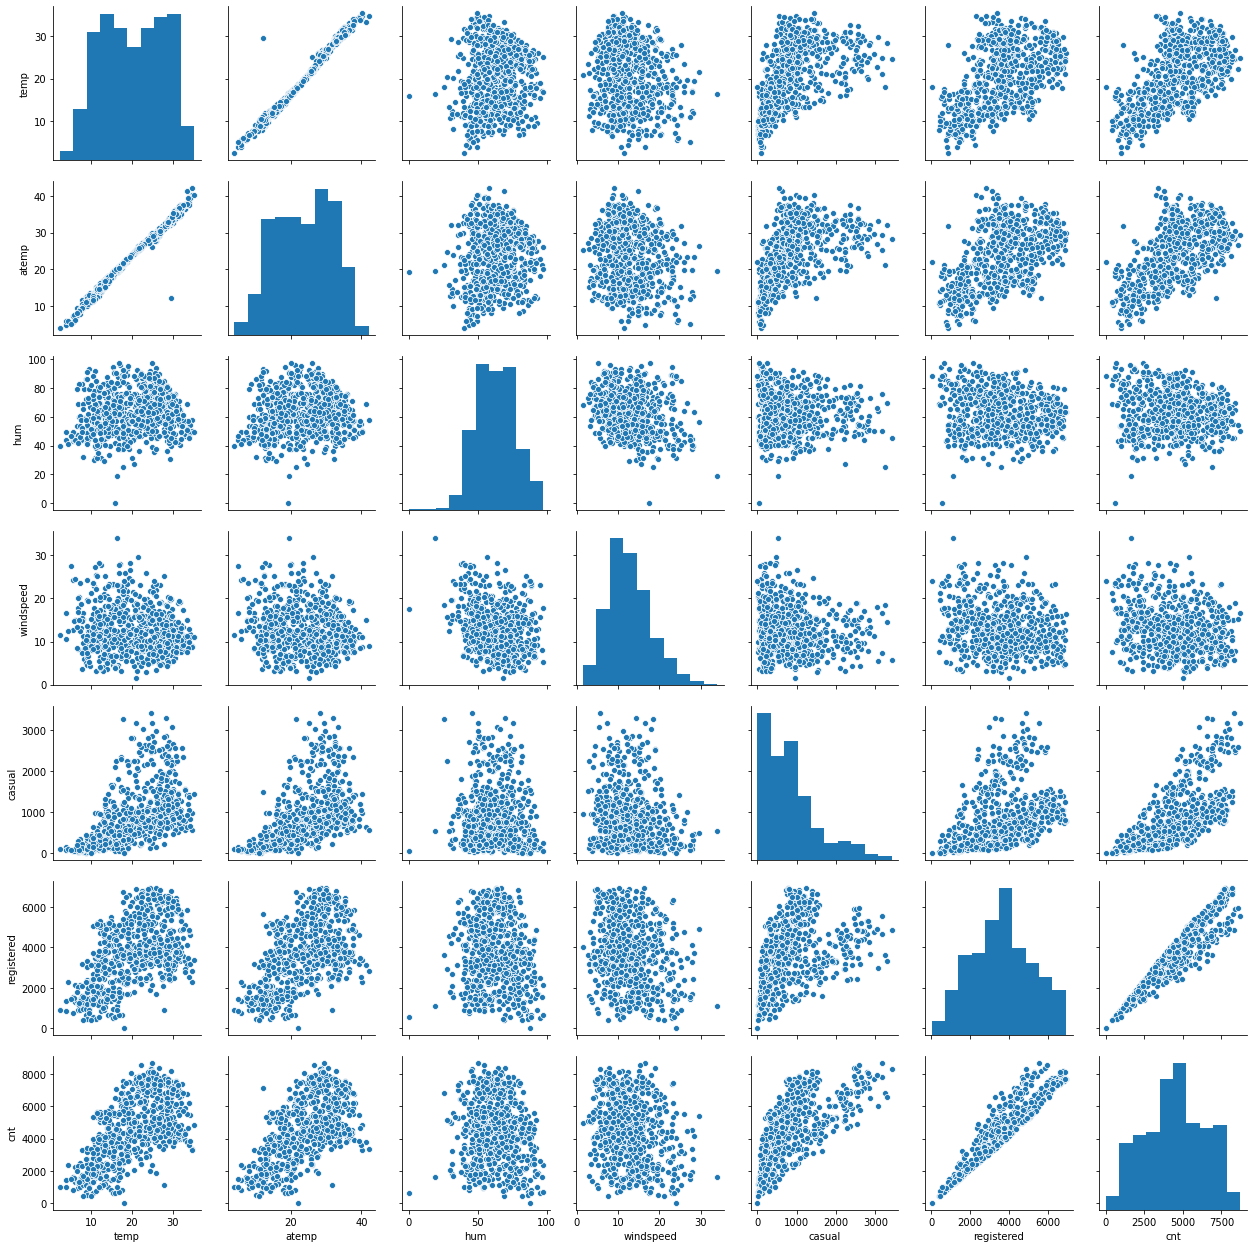

In [11]:
numeric_col = ['temp', 'atemp', 'hum', 'windspeed','casual','registered','cnt'] # all numeric columns
plt.figure(figsize=(20, 15))
sns.pairplot(bike[numeric_col])
plt.show()

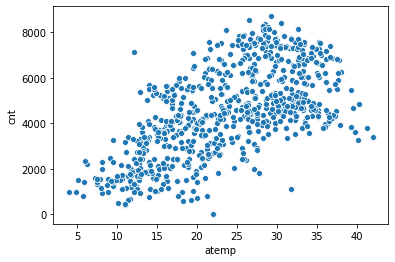

In [12]:
# atemp seems to be having linear relationship with cnt. Lets visualize by scatter plot 
sns.scatterplot(x = 'atemp',y = 'cnt',data = bike)
plt.show()

# Intuitive Observation: Demand of shared bikes increase with increase in temp which make sense as per US weather condition

#### Visualize Categorical Variables

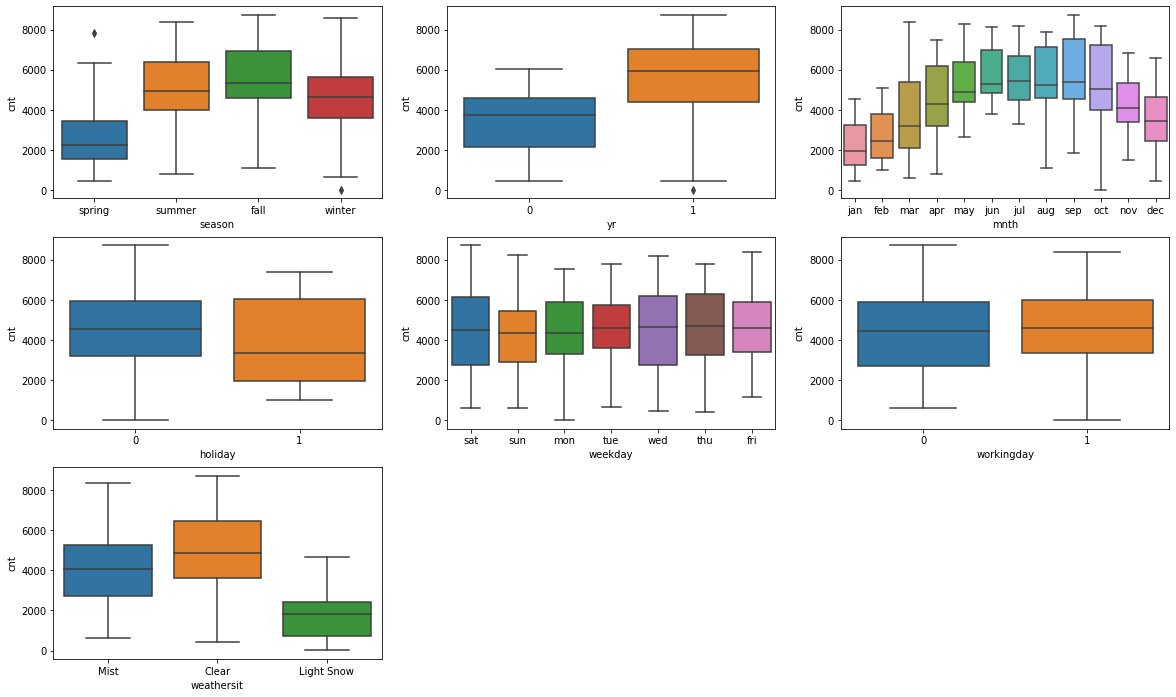

In [13]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x= 'season',y = 'cnt',data = bike)
plt.subplot(3,3,2)
sns.boxplot(x= 'yr',y = 'cnt',data = bike)
plt.subplot(3,3,3)
sns.boxplot(x= 'mnth',y = 'cnt',data = bike)
plt.subplot(3,3,4)
sns.boxplot(x= 'holiday',y = 'cnt',data = bike)
plt.subplot(3,3,5)
sns.boxplot(x= 'weekday',y = 'cnt',data = bike)
plt.subplot(3,3,6)
sns.boxplot(x= 'workingday',y = 'cnt',data = bike)
plt.subplot(3,3,7)
sns.boxplot(x= 'weathersit',y = 'cnt',data = bike)
plt.show()

# Step 2: Data Preparation

In [14]:
# Drop Dteday as yr, mnth and weekday columns are present in the dataset.
bike.drop(columns = 'dteday',axis = 1,inplace = True)
bike.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [15]:
# Drop columns casual and registered as target variable is sum of these two columns
bike.drop(columns = ['casual','registered'],axis = 1,inplace = True)
bike.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,2,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,3,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,4,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,5,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


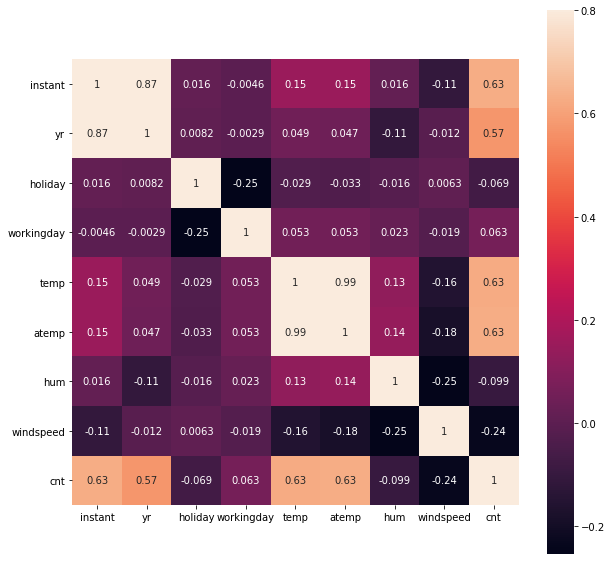

In [16]:
#Visualize the correlation between different features
plt.figure(figsize=(10, 10))
sns.heatmap(bike.corr(),vmax=.8, square=True,annot=True)
plt.show()

In [17]:
#Find correlation between temp and atemp
bike['temp'].corr(bike['atemp'])
# Corelation is .99 which is too high

0.9916961786905648

In [18]:
#Drop either of the columns. 
bike.drop(columns = ['temp'],axis = 1,inplace = True)

In [19]:
# Drop column 'instant'
bike.drop(columns = 'instant',axis = 1,inplace = True)

In [20]:
# Round decimal values  
bike['atemp'] = np.round(bike['atemp'],2)
bike['hum'] = np.round(bike['hum'],2)
bike['windspeed'] = np.round(bike['windspeed'],2)


In [21]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Mist,18.18,80.58,10.75,985
1,spring,0,jan,0,sun,0,Mist,17.69,69.61,16.65,801
2,spring,0,jan,0,mon,1,Clear,9.47,43.73,16.64,1349
3,spring,0,jan,0,tue,1,Clear,10.61,59.04,10.74,1562
4,spring,0,jan,0,wed,1,Clear,11.46,43.70,12.52,1600


#### Create dummy variables for all categorical features

1. Create dummy variables for column 'season'

In [22]:
bookingSeason = pd.get_dummies(bike['season'], drop_first = True) ## create dummy and drop first 
bike = pd.concat([bike, bookingSeason], axis = 1) ## concatenate dummy column
bike.drop(['season'], axis = 1, inplace = True) ## Drop original column as dummy column added
bike.head()

#  000 represents season = 'Fall'

,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,jan,0,sat,0,Mist,18.18,80.58,10.75,985,1,0,0
1,0,jan,0,sun,0,Mist,17.69,69.61,16.65,801,1,0,0
2,0,jan,0,mon,1,Clear,9.47,43.73,16.64,1349,1,0,0
3,0,jan,0,tue,1,Clear,10.61,59.04,10.74,1562,1,0,0
4,0,jan,0,wed,1,Clear,11.46,43.70,12.52,1600,1,0,0


2. Create dummy variables for column 'mnth'


In [23]:
month = pd.get_dummies(bike['mnth'], drop_first = True) ## create dummy and drop first 
bike = pd.concat([bike, month], axis = 1) ## concatenate dummy column
bike.drop(['mnth'], axis = 1, inplace = True) ## Drop original column as dummy column added
bike.head()


,yr,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,sat,0,Mist,18.18,80.58,10.75,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,sun,0,Mist,17.69,69.61,16.65,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,mon,1,Clear,9.47,43.73,16.64,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,tue,1,Clear,10.61,59.04,10.74,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,wed,1,Clear,11.46,43.70,12.52,1600,1,...,0,0,1,0,0,0,0,0,0,0


3. Create dummy variables for column 'weekday'

In [24]:
dayofweek = pd.get_dummies(bike['weekday'], drop_first = True) ## create dummy and drop first 
bike = pd.concat([bike, dayofweek], axis = 1) ## concatenate dummy column
bike.drop(['weekday'], axis = 1, inplace = True) ## Drop original column as dummy column added
bike.head()

,yr,holiday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
0,0,0,0,Mist,18.18,80.58,10.75,985,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,Mist,17.69,69.61,16.65,801,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,Clear,9.47,43.73,16.64,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,Clear,10.61,59.04,10.74,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,Clear,11.46,43.70,12.52,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


4. Create dummy variables for column 'weathersit'


In [25]:
weather = pd.get_dummies(bike['weathersit'], drop_first = True) ## create dummy and drop first 
bike = pd.concat([bike, weather], axis = 1) ## concatenate dummy column
bike.drop(['weathersit'], axis = 1, inplace = True) ## Drop original column as dummy column added
bike.head()

## 00 represents Clear, Few clouds, Partly cloudy, Partly cloudy

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,Light Snow,Mist
0,0,0,0,18.18,80.58,10.75,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,17.69,69.61,16.65,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,9.47,43.73,16.64,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.61,59.04,10.74,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,11.46,43.70,12.52,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


### Split the Data into Training and Testing Sets

In [26]:
from sklearn.model_selection import train_test_split

bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [27]:
bike_train.shape

(510, 29)

### Rescaling the Features 

Use MinMax scaling.

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [29]:
# Apply scaler() to all the columns except the binary and 'dummy' variables as they are already in range 0 to 1
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,Light Snow,Mist
653,1,0,1,0.501181,0.575330,0.300930,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.766343,0.725680,0.264678,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.438960,0.640148,0.255374,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.200315,0.498042,0.663138,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.391966,0.504534,0.188643,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1


# Step3:  Model Building

In [30]:
# Declare predictor(X) and target variable(y)
y_train = bike_train.pop('cnt')
X_train = bike_train

### Feature selection using RFE of SciKit Library (automated approach)

##### Filter top 15 features automatically using RFE

In [31]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [32]:
# build linear regression model
lr = LinearRegression()
lr.fit(X_train,y_train)

## Apply RFE on model to select top 15 features             
rfe = RFE(lr, n_features_to_select = 15).fit(X_train,y_train)

In [33]:
#Check selected features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 5),
 ('winter', True, 1),
 ('aug', False, 6),
 ('dec', False, 2),
 ('feb', False, 4),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 8),
 ('mar', False, 14),
 ('may', False, 7),
 ('nov', False, 3),
 ('oct', False, 10),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 13),
 ('tue', False, 12),
 ('wed', False, 11),
 ('Light Snow', True, 1),
 ('Mist', True, 1)]

In [34]:
# List 15 features
topCol = X_train.columns[rfe.support_]
topCol

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'winter', 'jan', 'jul', 'sep', 'sat', 'sun', 'Light Snow', 'Mist'],
      dtype='object')

### Manual Model Building using statsmodel

Steps:
    1. Build the model
    
    2. Check Summary
    
    3. Calc VIF to check correlation between features
    
    4. Drop features which has VIF > 5 (one-by-one)
    
    5. Rebuild the model till all features has VIF < 5 
    
    6. Drop features which has P>|t| > 0.05 (one-by-one)
    
    7. Rebuild the model till all features has P>|t| < 0.05
    
      
    
    

### Model 1

In [35]:
# Creating X_test dataframe with top 15 features 
X_train_1 = X_train[topCol]

In [36]:
X_train_1

,yr,holiday,workingday,atemp,hum,windspeed,spring,winter,jan,jul,sep,sat,sun,Light Snow,Mist
653,1,0,1,0.501181,0.575330,0.300930,0,1,0,0,0,0,0,0,0
576,1,0,1,0.766343,0.725680,0.264678,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438960,0.640148,0.255374,1,0,0,0,0,1,0,0,1
728,1,0,0,0.200315,0.498042,0.663138,1,0,0,0,0,0,1,0,0
482,1,0,0,0.391966,0.504534,0.188643,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.762405,0.605833,0.355791,0,0,0,0,0,0,0,0,1
578,1,0,1,0.824363,0.679720,0.187360,0,0,0,0,0,0,0,0,0
53,0,0,1,0.218955,0.435903,0.111646,1,0,0,0,0,0,0,0,0
350,0,0,0,0.223681,0.577906,0.431825,0,1,0,0,0,1,0,0,1


In [37]:
import statsmodels.api as sm

In [38]:
# Adding a constant variable as statsModel doesn't add constant by default
X_train_1 = sm.add_constant(X_train_1)

In [39]:
# Fit into linear model
lm1 = sm.OLS(y_train,X_train_1).fit()  

In [40]:
#Check summary of fitted linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.67e-188
Time:                        22:20:22   Log-Likelihood:                 510.31
No. Observations:                 510   AIC:                            -990.6
Df Residuals:                     495   BIC:                            -927.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2535      0.026      9.913      0.0

#### Calculate VIF

In [41]:
# Let's see colums for VIF calc
X_train_1.columns

Index(['const', 'yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'spring', 'winter', 'jan', 'jul', 'sep', 'sat', 'sun', 'Light Snow',
       'Mist'],
      dtype='object')

In [42]:
# Column 'const' is not a feature hence drop before calculating VIF
X_train_2 = X_train_1.drop(['const'], axis=1)

# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe with 2 Columns
# 1. Features    2. VIF value

#Initialize
X = X_train_2 # Set X
df_VIF = pd.DataFrame() 

# Set Features
df_VIF['Features'] = X.columns

#Calc VIF
df_VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Report VIF
df_VIF['VIF'] = round(df_VIF['VIF'], 2)
df_VIF = df_VIF.sort_values(by = "VIF", ascending = False)
df_VIF

,Features,VIF
2,workingday,41.68
11,sat,10.16
12,sun,9.84
3,atemp,3.11
6,spring,2.66
1,holiday,2.57
4,hum,1.91
7,winter,1.75
14,Mist,1.57
8,jan,1.56


In [43]:
# Feature 'workingday' has VIF > 5 hence should be dropped first
X_train_2 = X_train_2.drop(['workingday'], axis=1)

In [44]:
X_train_2

,yr,holiday,atemp,hum,windspeed,spring,winter,jan,jul,sep,sat,sun,Light Snow,Mist
653,1,0,0.501181,0.575330,0.300930,0,1,0,0,0,0,0,0,0
576,1,0,0.766343,0.725680,0.264678,0,0,0,1,0,0,0,0,0
426,1,0,0.438960,0.640148,0.255374,1,0,0,0,0,1,0,0,1
728,1,0,0.200315,0.498042,0.663138,1,0,0,0,0,0,1,0,0
482,1,0,0.391966,0.504534,0.188643,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,0.762405,0.605833,0.355791,0,0,0,0,0,0,0,0,1
578,1,0,0.824363,0.679720,0.187360,0,0,0,0,0,0,0,0,0
53,0,0,0.218955,0.435903,0.111646,1,0,0,0,0,0,0,0,0
350,0,0,0.223681,0.577906,0.431825,0,1,0,0,0,1,0,0,1


#### Model 2

In [45]:
# Adding constant in the new train dataset
X_train_2 = sm.add_constant(X_train_2)
lm2 = sm.OLS(y_train,X_train_2).fit()

In [46]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.67e-188
Time:                        22:20:22   Log-Likelihood:                 510.31
No. Observations:                 510   AIC:                            -990.6
Df Residuals:                     495   BIC:                            -927.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3501      0.031     11.154      0.0

Re-calc VIF

In [47]:
# Column 'const' is not a feature hence drop before calculating VIF
X_train_3 = X_train_2.drop(['const'], axis=1)

# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe with 2 Columns
# 1. Features    2. VIF value

#Initialize
X = X_train_3 # Set X
df_VIF = pd.DataFrame() 

# Set Features
df_VIF['Features'] = X.columns

#Calc VIF
df_VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Report VIF
df_VIF['VIF'] = round(df_VIF['VIF'], 2)
df_VIF = df_VIF.sort_values(by = "VIF", ascending = False)
df_VIF

,Features,VIF
3,hum,24.02
2,atemp,15.97
4,windspeed,4.00
5,spring,2.86
13,Mist,2.26
0,yr,2.06
6,winter,2.06
7,jan,1.67
8,jul,1.40
10,sat,1.23


In [48]:
# Feature 'hum' has VIF > 5 hence should be dropped next
X_train_3 = X_train_3.drop(['hum'], axis=1)

### Model 3

In [49]:

# Adding constant in the newly created train dataset without column 'hum'
X_train_3 = sm.add_constant(X_train_3)
lm3 = sm.OLS(y_train,X_train_3).fit()

print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.6
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.52e-186
Time:                        22:20:22   Log-Likelihood:                 502.89
No. Observations:                 510   AIC:                            -977.8
Df Residuals:                     496   BIC:                            -918.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2744      0.025     11.112      0.0

#### Calc VIF on Model 3

In [50]:
# Column 'const' is not a feature hence drop before calculating VIF
X_train_4 = X_train_3.drop(['const'], axis=1)

# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe with 2 Columns
# 1. Features    2. VIF value

#Initialize
X = X_train_4 # Set X
df_VIF = pd.DataFrame() 

# Set Features
df_VIF['Features'] = X.columns

#Calc VIF
df_VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Report VIF
df_VIF['VIF'] = round(df_VIF['VIF'], 2)
df_VIF = df_VIF.sort_values(by = "VIF", ascending = False)
df_VIF

,Features,VIF
2,atemp,4.66
3,windspeed,3.96
4,spring,2.26
0,yr,2.06
6,jan,1.60
12,Mist,1.53
5,winter,1.43
7,jul,1.35
9,sat,1.23
10,sun,1.21


On Model3, the multicollinearity has been removed completely as we can see VIF<5 for all the features

Now, Check p-value of features

In [51]:
# P-value of feature 'sat' is > 0.05 hence can be droped next
X_train_4 = X_train_3.drop(['sat'], axis=1)

### Model 4

In [52]:
# Adding constant in the newly created train dataset 
X_train_4 = sm.add_constant(X_train_4)
lm4 = sm.OLS(y_train,X_train_4).fit()

print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     213.9
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.70e-187
Time:                        22:20:22   Log-Likelihood:                 502.36
No. Observations:                 510   AIC:                            -978.7
Df Residuals:                     497   BIC:                            -923.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2765      0.025     11.241      0.0

After Model 4, all the features are significant and there is very low correlation between them

## Residual Analysis of the train data

To be tested:

    Error Terms are normally distributed and mean centered around 0

    Error Term = y(actual)-y(predicted)

In [53]:
# Calc y-predicted
y_train_pred = lm4.predict(X_train_4)

In [54]:
y_train_pred

653    0.731288
576    0.754311
426    0.482885
728    0.356058
482    0.578037
         ...   
526    0.719835
578    0.852684
53     0.251593
350    0.272142
79     0.315063
Length: 510, dtype: float64

Text(0.5, 0, 'Errors')

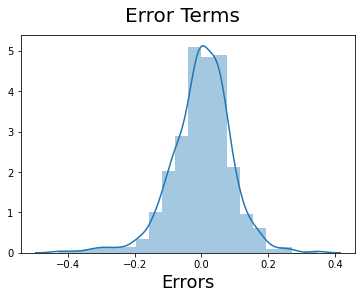

In [55]:
# Plot the histogram of the error terms
fig = plt.figure()
error_term = y_train - y_train_pred
sns.distplot(error_term, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

It is evident from the graph that error terms are normally ditributed and mean centered around 0.

## Step 4: Model Evaluation and Prediction

### Prediction using Test Data

##### Apply Scaling on test data

In [56]:
# Apply scaler() to all the columns except the binary and 'dummy' variables as they are already in range 0 to 1
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,Light Snow,Mist
184,0,1,0,0.769756,0.657358,0.084376,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.842741,0.610161,0.153994,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.496193,0.837696,0.334296,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.795484,0.437139,0.339750,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.741664,0.314303,0.537376,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [57]:
# Declare predictor(X) and target variable(y)
y_test = bike_test.pop('cnt')
X_test = bike_test

Prediction using the final model

In [58]:
# Creating X_test_new dataframe with same column as trained X
X_test_1 = X_test[X_train_4.columns.drop('const')]
# Adding a constant variable 
X_test_2 = sm.add_constant(X_test_1)

In [59]:
# Making predictions using model 4
y_pred = lm4.predict(X_test_2)

In [60]:
y_pred

184    0.359497
535    0.865329
299    0.406151
221    0.583602
152    0.533113
         ...   
400    0.343188
702    0.738396
127    0.474592
640    0.762675
72     0.289425
Length: 219, dtype: float64

## Model Evaluation

Text(0, 0.5, 'residual')

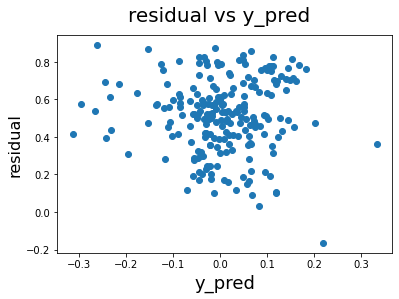

In [73]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
residual = y_test-y_pred
plt.scatter(residual,y_pred)
fig.suptitle('residual vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_pred', fontsize=18)                          # X-label
plt.ylabel('residual', fontsize=16)                          # Y-label

# As there are no pattern observed, X and y are in linear relationship.

<Figure size 432x288 with 0 Axes>

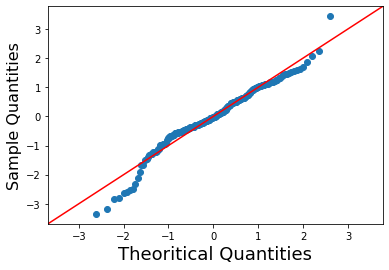

In [74]:
# Plotting Q-Q plot to understand the spread.
fig = plt.figure()
sm.qqplot(residual,fit = True, line = '45')             # Plot heading 
plt.xlabel('Theoritical Quantities', fontsize=18)                          # X-label
plt.ylabel('Sample Quantities', fontsize=16) 
plt.show()# Y-label

# As the spead is linear, X and y are in linear relationship

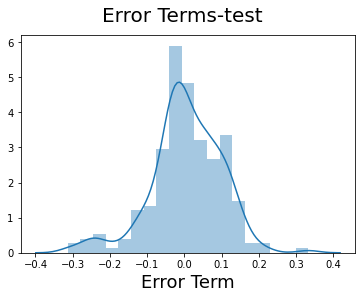

In [70]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
sns.distplot(y_test-y_pred)
fig.suptitle('Error Terms-test', fontsize=20)              # Plot heading 
plt.xlabel('Error Term', fontsize=18)                          # X-label
plt.show()

# Error Term of test data is also close to normal distribution curve and centered around 0. 